In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


<h4>The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service

In [11]:
X_i=list(df.columns[:-1])
X=df[X_i].values
# X[0:5]
Y=df["custcat"].values
Y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

Normalize data

In [13]:
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [32]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
# Train and predict
k=4
neigh=KNeighborsClassifier(n_neighbors=k).fit(X_train,Y_train)
# Predict
Yhat=neigh.predict(X_test)
# Yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

In [29]:
# Accuracy evaluation
from sklearn import metrics
print("Train set accuracy",metrics.accuracy_score(Y_train,neigh.predict(X_train)))
print("Test set accuracy",metrics.accuracy_score(Yhat,Y_test))

Train set accuracy 0.5475
Test set accuracy 0.32


In [53]:
# Testing for other values of k
ks=10
mean_acc=np.zeros((ks-1))
std_acc=np.zeros(ks-1)
for i in range(1,ks):
    neigh=KNeighborsClassifier(n_neighbors=i).fit(X_train,Y_train)
    Yhat=neigh.predict(X_test)
    mean_acc[i-1]=metrics.accuracy_score(Y_test,Yhat)
    std_acc[i-1]=np.std(Yhat==Y_test)/np.sqrt(Yhat.shape[0])
mean_acc
std_acc

array([0.0324037 , 0.03208582, 0.03284623, 0.03298485, 0.03284623,
       0.03270321, 0.03337477, 0.0331191 , 0.03349627])

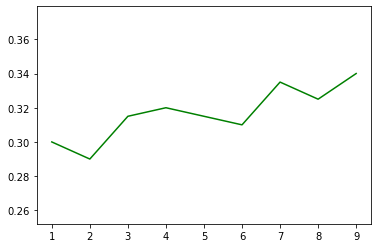

In [64]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.0)
plt.show()

In [48]:
# # Y_train.shape
# print(X_test.shape)
# print(Y_test.shape)
# print(X_train.shape)
# print(Y_train.shape)
# print(neigh.predict(X_train).shape)
# # print(len(df.columns))
# np.zeros((9))

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [41]:
np.std(Yhat==Y_test)/np.sqrt(Yhat.shape[0])


0.03298484500494128

In [46]:
a=np.array([1,2,3,4,5])
b=np.array([0,12,1,2,3])
# np.substract(a,b)
a.dot(b)

50